In [ ]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [ ]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [ ]:
# create engine to hawaii.sqlite
Base = automap_base()
engine = create_engine("sqlite:///hawaii.sqlite")


In [ ]:
# reflect an existing database into a new model
Base.prepare(engine,reflect=True)
# reflect the tables


In [ ]:
# View all of the classes that automap found
Base.classes.keys()

In [ ]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [ ]:
# Create our session (link) from Python to the DB
session = Session(engine)
# session_station = Session(engine)

# Exploratory Precipitation Analysis

In [ ]:
# Find the most recent date in the data set.
engine.execute('SELECT * FROM Measurement ORDER BY date DESC').fetchall()

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# engine.execute("SELECT Date FROM Measurement ORDER BY Date DESC").fetchone()
# # Calculate the date one year from the last date in data set.
# engine.execute("SELECT Date FROM Measurement WHERE Date > '2016-08-23'").fetchone()
# # Perform a query to retrieve the data and precipitation scores
# engine.execute("SELECT Date, prcp FROM Measurement WHERE Date > '2016-08-23'").fetchall()

# # Save the query results as a Pandas DataFrame and set the index to the date column
# results = session.query()

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
engine.execute("SELECT Date FROM Measurement ORDER BY Date DESC").fetchone()
# Calculate the date one year from the last date in data set.

In [ ]:
# Calculate the date one year from the last date in data set.
engine.execute("SELECT Date FROM Measurement WHERE Date > '2016-08-23'").fetchone()


In [ ]:
# Perform a query to retrieve the data and precipitation scores
engine.execute("SELECT Date, prcp FROM Measurement WHERE Date > '2016-08-23'").fetchall()


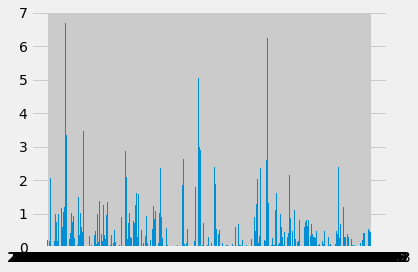

In [104]:
# Save the query results as a Pandas DataFrame and set the index to the date column
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > "2016-08-24", Measurement.prcp !=None).all()

# Sort the dataframe by date
type(results)
mes_df = pd.DataFrame(results)
mes_df = mes_df.set_index('date').sort_index()
mes_df = mes_df.reset_index()
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
ax.bar(mes_df['date'], mes_df['prcp'])
plt.tight_layout()
# mes_df


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
plt.bar(mes_df['date'], mes_df['prcp'])
plt.show()

# Exploratory Station Analysis

In [52]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.name).count()
print(f'There are {station_count} stations')

There are 9 stations


In [71]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
m_active = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

m_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [101]:
# TODO: Fix Decimal places
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
m_station = session.query(Measurement.station, func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
# m_station[0][0]


print(f'Station {m_station[0][0]} highest temp is {m_station[0][1]}F and lowest temp is {m_station[0][2]}F with an average of {m_station[0][3]}F.')

Station USC00519281 highest temp is 85.0F and lowest temp is 54.0F with an average of 71.66378066378067F.


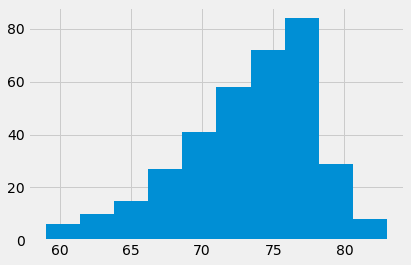

,station,tobs,date
0,USC00519281,79.0,2017-08-18
1,USC00519281,76.0,2017-08-17
2,USC00519281,76.0,2017-08-16
3,USC00519281,77.0,2017-08-15
4,USC00519281,77.0,2017-08-14
...,...,...,...
345,USC00519281,78.0,2016-08-29
346,USC00519281,73.0,2016-08-28
347,USC00519281,75.0,2016-08-27
348,USC00519281,80.0,2016-08-26


In [96]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
m_station_graph = session.query(Measurement.station, Measurement.tobs, Measurement.date).\
    filter(Measurement.station == 'USC00519281', Measurement.date > "2016-08-24").order_by((Measurement.date).desc()).all()
m_station_graph
m_station_df = pd.DataFrame(m_station_graph)
# m_station_df = m_station_df.set_index('date').sort_index()
# m_station_df = m_station_df.reset_index()
plt.hist(m_station_df['tobs'])
plt.show()
# m_station_df.to_csv('test')
# m_station_df

# Close session

In [ ]:
# Close Session
session.close()